# TASK - 1: Iris Flower Classification

The data set consists of 50 samples from each of three species of Iris **Species(Class)**:
1. Setosa
2. Versicolor
3. Virginica, which is different according to their measurements.

This dataset is organized into three classes, each containing 50 instances, representing different types of Iris plants.

**Four features were measured from each sample, in centimeters:**
1. Petal Length
2. Petal Width
3. Sepal Length
4. Sepal width
5. Class(Species)

# 1. Importing Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# 2. Loading/Reading the Data Set

In [97]:
DF=pd.read_csv('/content/Iris.csv')
DF.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [98]:
# Display number of samples on each class
DF['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [99]:
# To display the  concise summary of the data set.
print("display the information about the data set ")
DF.info()

# To display the descriptive stats about data
print("display the statistics of the data set ")
DF.describe()

display the information about the data set 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
display the statistics of the data set 


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# 3. Data Cleaning

In [100]:
# Delete the 'Id' column
df = DF.drop(columns=["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [101]:
#To check whether the data set has any Null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [102]:
#To check wheather the data set has any duplicated values
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


# 4. Data Visualisation

In [103]:
sns.set_style("whitegrid")

Text(0.5, 1.0, 'Sepal Length Vs. Sepal Width (in Cm)')

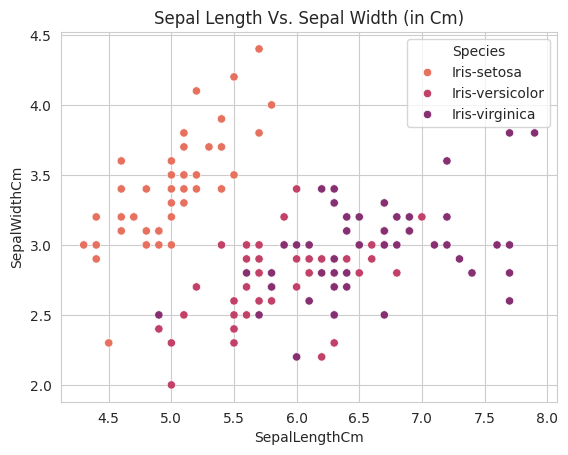

In [104]:
sns.scatterplot(data=df,x='SepalLengthCm',y='SepalWidthCm',hue='Species',palette="flare")
plt.ylabel('SepalWidthCm')
plt.xlabel("SepalLengthCm")
plt.title("Sepal Length Vs. Sepal Width (in Cm)")

Text(0.5, 1.0, 'Petal Lenght Vs. Petal Width (in Cm)')

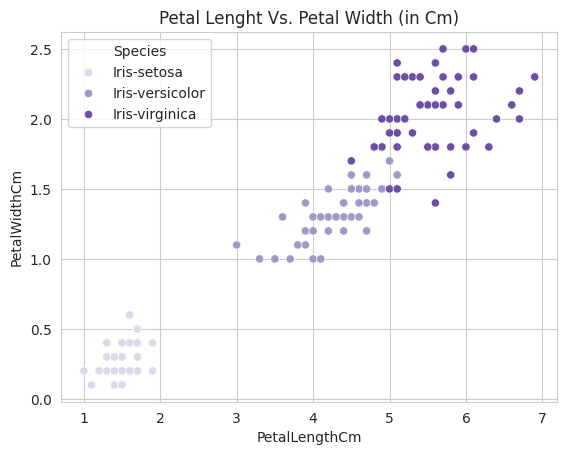

In [105]:
sns.scatterplot(data=df,x='PetalLengthCm',y='PetalWidthCm',hue='Species',palette="Purples")
plt.ylabel('PetalWidthCm')
plt.xlabel("PetalLengthCm")
plt.title("Petal Lenght Vs. Petal Width (in Cm)")

<Axes: xlabel='Species', ylabel='count'>

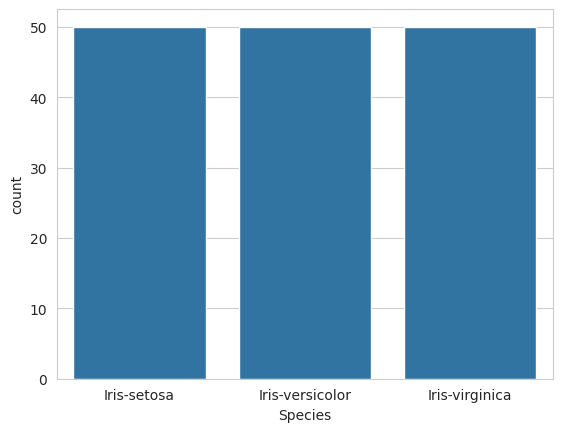

In [106]:
sns.countplot(x='Species',data=df)

Text(0.5, 1.0, 'Species Vs. Sepal length(in Cm)')

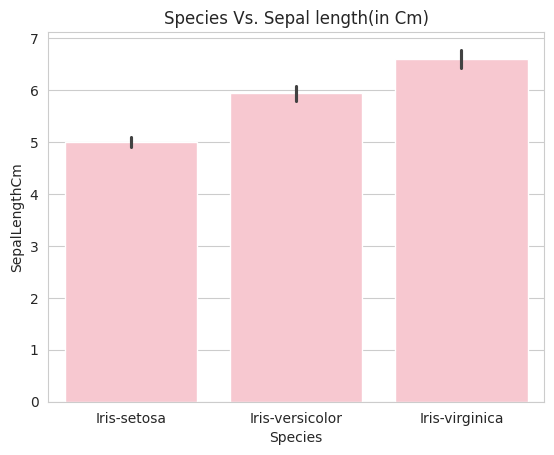

In [107]:
sns.barplot(x='Species', y='SepalLengthCm', color='pink', data=df)
plt.title("Species Vs. Sepal length(in Cm)")

Text(0.5, 1.0, 'Species Vs. Sepal Width(in Cm)')

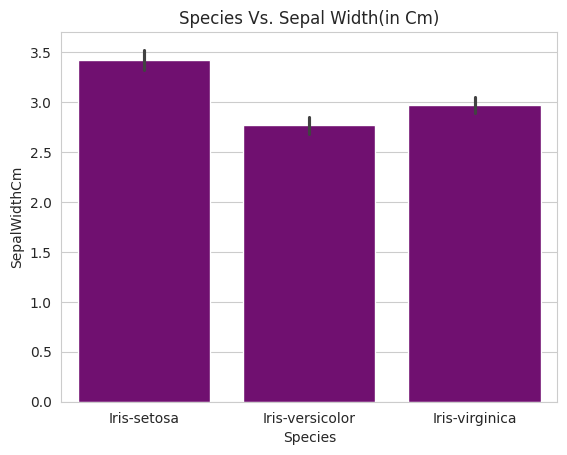

In [108]:
sns.barplot(x='Species', y='SepalWidthCm', color='purple', data=df)
plt.title("Species Vs. Sepal Width(in Cm)")

Text(0.5, 1.0, 'Species Vs. Petal Width(in Cm)')

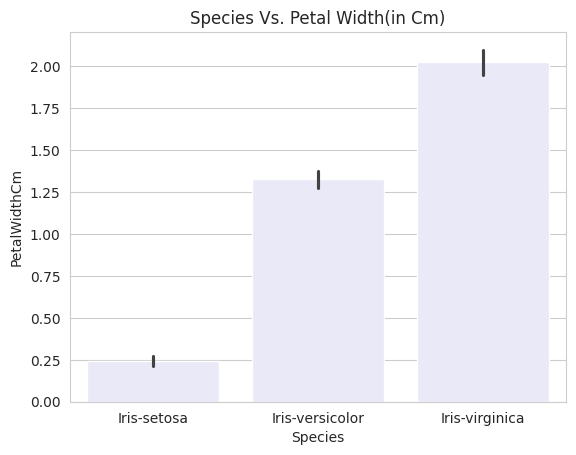

In [109]:
sns.barplot(x='Species', y='PetalWidthCm', color='lavender', data=df)
plt.title("Species Vs. Petal Width(in Cm)")

Text(0.5, 1.0, 'Species Vs. Petal length(in Cm)')

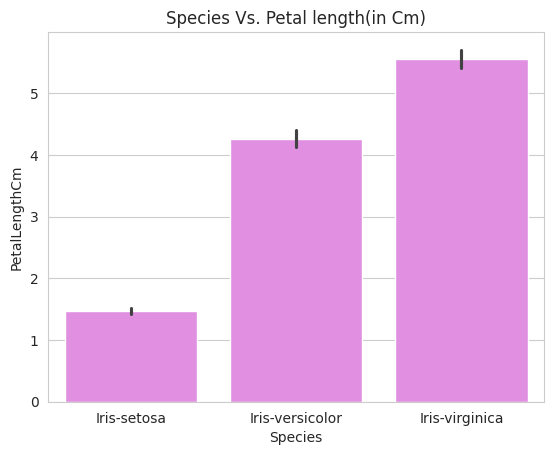

In [110]:
sns.barplot(x='Species', y='PetalLengthCm', color='violet', data=df)
plt.title("Species Vs. Petal length(in Cm)")

Text(0.5, 1.0, 'Overall visualistion of the Data Set')

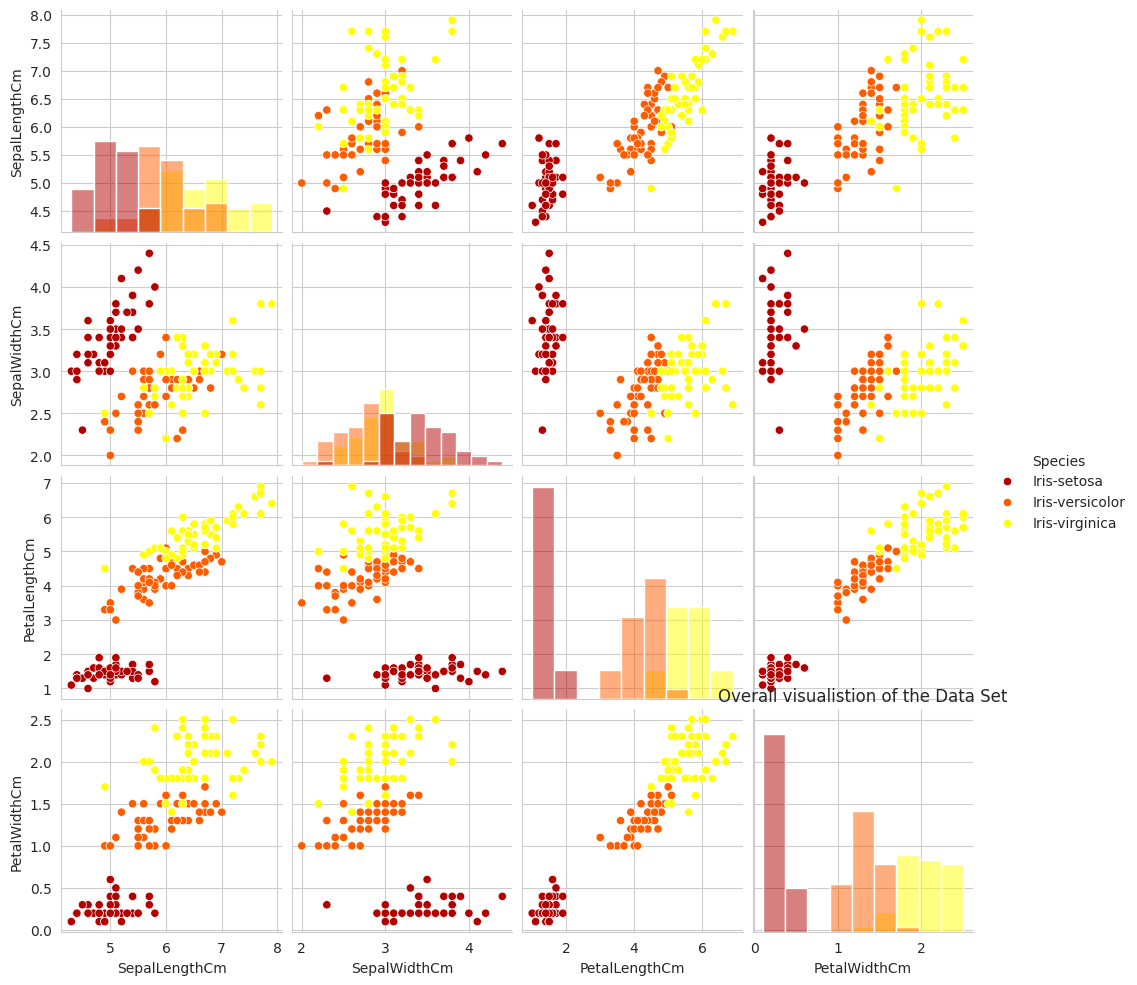

In [111]:
sns.pairplot(data = df, hue='Species', diag_kind="hist", palette="hot")
plt.title('Overall visualistion of the Data Set')

# Label Encoding
To convert categorical columns into numerical values so that they can be used in machine learning models which only take numerical data.

**Here we are converting 'Species' column data to Numeric data.**

In [112]:
#Before converting
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [113]:
#After converting
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 6. Machine Learning  


1.   Logistic Regression
2.   K - Neareast Neighbours
3. Linear Regression



In [114]:
# Split the data into train set and test set
# train - 70%
# test - 30%
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

# 1. Logistic Regression

In [115]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
# Model training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [116]:
# TO check the accuracy of the Model
accuracy_log = model.score(x_test, y_test) * 100
print("Accuracy of Logistic Regression: ", accuracy_log)

Accuracy of Logistic Regression:  93.33333333333333


# 2. K - Nearest Neighbours

In [117]:
#2. K-nearest neighbours Model(KNN)
from sklearn.neighbors import KNeighborsClassifier
# 2nd. Model Training
model1 = KNeighborsClassifier()
model1.fit(x_train, y_train)

KNeighborsClassifier()

In [118]:
# TO check the accuracy of the Model
accuracy_knn = model1.score(x_test, y_test) * 100
print("Accuracy of K-nearest neighbours: ", accuracy_log)

Accuracy of K-nearest neighbours:  93.33333333333333


# 3. Linear Regression

In [119]:
# 3.Linear Regression Model
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [120]:
# To make Predictions
pd1 = model2.predict(x_test)

In [121]:
#To Evaluate Model's Performance/Accuracy
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, pd1))
print('Mean Squared Error:', mean_squared_error(y_test, pd1))
score = np.sqrt(mean_squared_error(y_test, pd1))
print('Mean Root Squared Error:',score)

Mean Absolute Error: 0.18772105006160741
Mean Squared Error: 0.06158924326059378
Mean Root Squared Error: 0.24817180190463578


In [122]:
from sklearn.metrics import r2_score
score1 = r2_score(y_test, pd1)
print("The accuracy of linear regression model is {}%".format(round(score1, 2) *100))

The accuracy of linear regression model is 91.0%


# Confusion Matrix

In [123]:
from sklearn.metrics import confusion_matrix

In [124]:
y_pred1 = model.predict(x_test).round()
y_pred2 = model1.predict(x_test).round()
y_pred3 = model2.predict(x_test).round()

In [125]:
conf_matrix1 = confusion_matrix(y_test, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
conf_matrix3 = confusion_matrix(y_test, y_pred3)

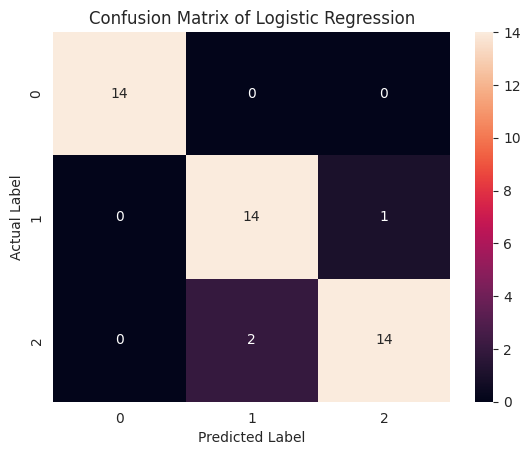

In [126]:
#'Confusion Matrix of Logistic Regression'
sns.heatmap(conf_matrix1, annot=True, fmt='d', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

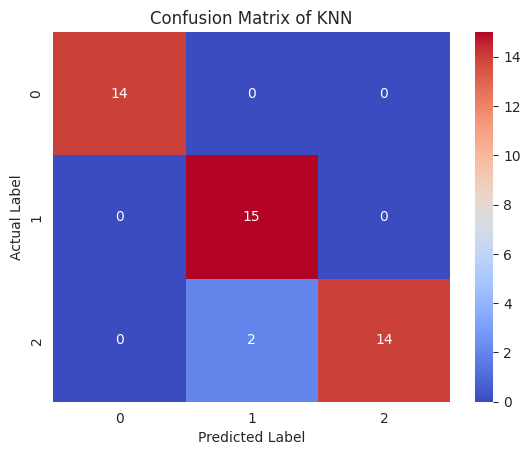

In [127]:
#'Confusion Matrix of KNN'
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='coolwarm', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of KNN')
plt.show()

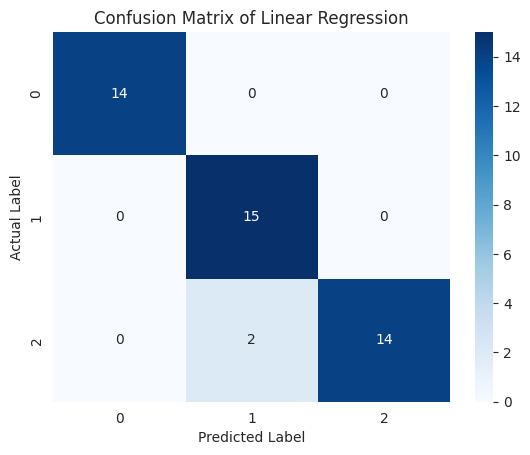

In [128]:
#Confusion Matrix for Linear Regression
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Linear Regression')
plt.show()


# Accuracy Comparison between the Models

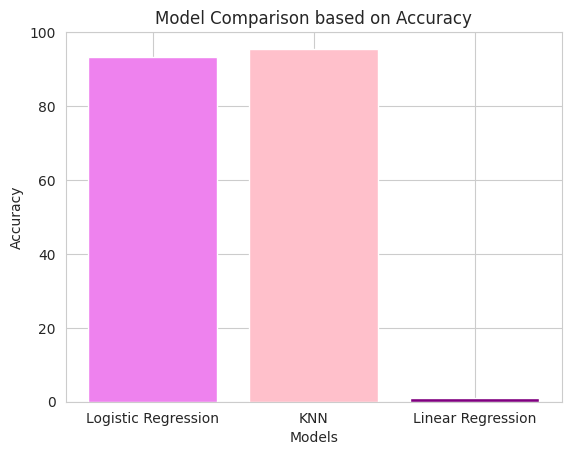

In [129]:
# Accuracy Comparison btw models - Visualization
models = ['Logistic Regression', 'KNN', 'Linear Regression']
accuracies = [accuracy_log, accuracy_knn,score1 ]

plt.bar(models, accuracies, color=['violet', 'pink', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison based on Accuracy")
plt.ylim([0, 100])
plt.show()